In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
rent = pd.read_csv('day.csv')

In [3]:
rent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
rent.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking the Shape of the Dataset

print(rent.shape)

(730, 16)


In [7]:
rent.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Checking the percentage of Null in each column of the Dataset 
round(100*(rent.isnull().sum()/len(rent)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
#Checking the percentage of Null in each row of the Dataset 
round(100*(rent.isnull().sum(axis=1)/len(rent)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
# There are no missing or Null values in the Dataset 

In [11]:
# Check for any duplicate records in the Dataset 

rent_dup = rent.copy()

rent_dup.drop_duplicates(inplace=True)

In [12]:
print(rent_dup.shape)
print(rent.shape)

(730, 16)
(730, 16)


In [13]:
# There are no duplicate records in the dataset as per above observation 

In [14]:
# Checking for all the values in the columns .If the values are valid 

In [15]:
# Dropping the instant value in the rent_dummy as its always unique 

In [16]:
rent_dummy = rent.iloc[:,1:16]

In [17]:
rent_dummy.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
rent_dummy.shape

(730, 15)

In [19]:
for col in rent_dummy:
    print(rent_dummy[col].value_counts(ascending=False),'\n\n')

26-02-2018    1
12-01-2018    1
13-11-2018    1
30-04-2019    1
21-08-2019    1
             ..
19-11-2018    1
20-12-2018    1
22-10-2018    1
23-06-2018    1
23-12-2018    1
Name: dteday, Length: 730, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 


1    499
0    231
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


10.899153    5
26.035000    5
29.144153    4
27.880000    4
23.130847    4
            ..
10.909567    1
17.459153    1
12.265847    1
27.230847    1
17.425000    1
Name: temp, Length: 498, dtype: int64 


32.73440    4
18.78105    3
31.85040    3
29.76730    2
28.72500    2
   

In [20]:
# As per above observations there is no unknown or Invalid data in the dataset 

In [21]:
## Removing the unwanted Columns from the dataset which are not required for the dataset creation. 

rent.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [22]:
rent_new = rent[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [23]:
rent_new.head()
#cnt is the Target variable for which a model has to be created 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
rent_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Creating Dummy Variables 

In [25]:
#Creating dummy variables for the columns in the dataset 
# Before creating the bummy variables we convert the data type into category for the columns 

rent_new['season']=rent_new['season'].astype('category')
rent_new['weathersit']=rent_new['weathersit'].astype('category')
rent_new['mnth']=rent_new['mnth'].astype('category')
rent_new['weekday']=rent_new['weekday'].astype('category')

In [26]:
rent_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [27]:
rent_new = pd.get_dummies(rent_new, drop_first=True)
rent_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [28]:
rent_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting the data into Test and Train Dataset 

In [29]:
# Splitting the Test train dataset into 30 : 70 ratio
np.random.seed(0)
rent_train, rent_test = train_test_split(rent_new, train_size=0.7, random_state=333)

In [30]:
rent_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,3.957390,4.941955,43.6522,16.522200,986,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,20.295000,24.399800,50.2917,12.791439,7460,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,33.722500,39.519800,57.3750,8.417143,4672,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,25.454153,29.198350,53.0417,17.042589,7129,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,15.819153,19.822700,59.5417,4.125244,3750,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
rent_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,1,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
print(rent_train.shape)
print(rent_test.shape)

(510, 30)
(220, 30)


In [33]:
rent_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 650 to 419
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

## Exploratory Data Analysis 

In [34]:
# Performing the EDA for the train dataset 

rent_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:
# Extracting only the Numeric columns from the dataset 

rent_train_num = rent_train[['temp', 'atemp', 'hum', 'windspeed','cnt']]

In [36]:
rent_train_num.head()

,temp,atemp,hum,windspeed,cnt
650,16.126653,19.56980,49.4583,9.791514,7109
212,31.638347,35.16460,55.0833,10.500039,4266
714,14.862500,18.49690,83.8750,6.749714,3786
8,5.671653,5.80875,43.4167,24.250650,822
502,23.130847,27.55605,52.3333,9.166739,7639


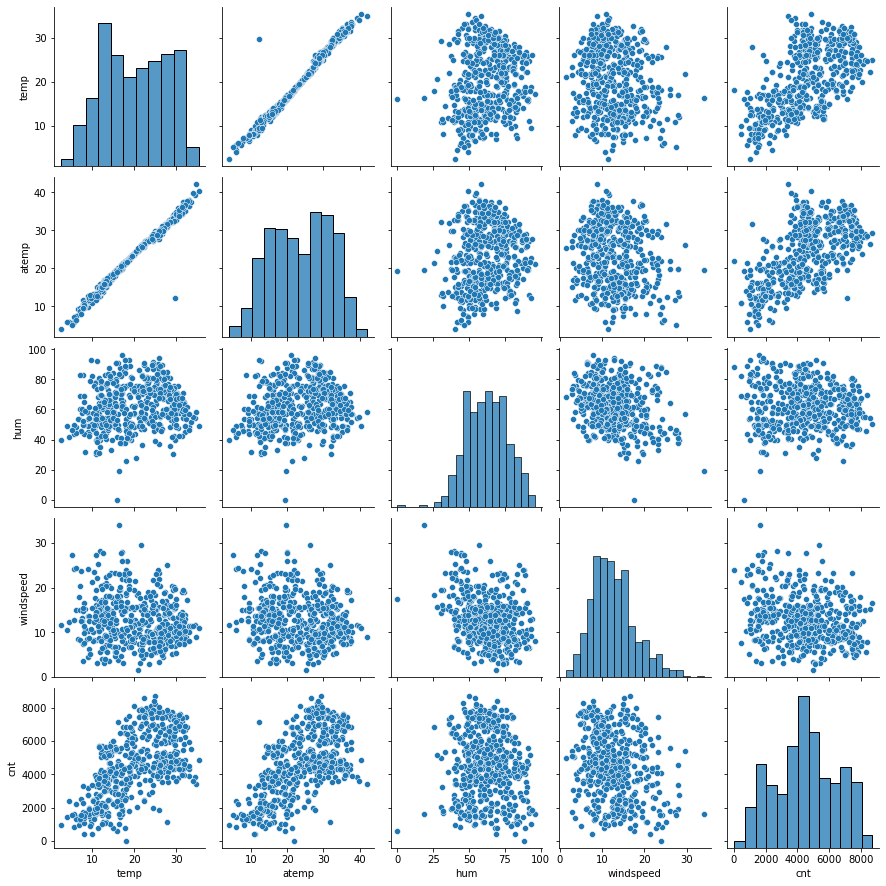

In [37]:
sns.pairplot(data= rent_train_num, diag_kind='hist')
# From the plots below we can draw a understanding that
#1. temp, atemp, and cnt are linearly related as per the scatter plots

In [38]:
## Visualising the categorical data from the dataset 



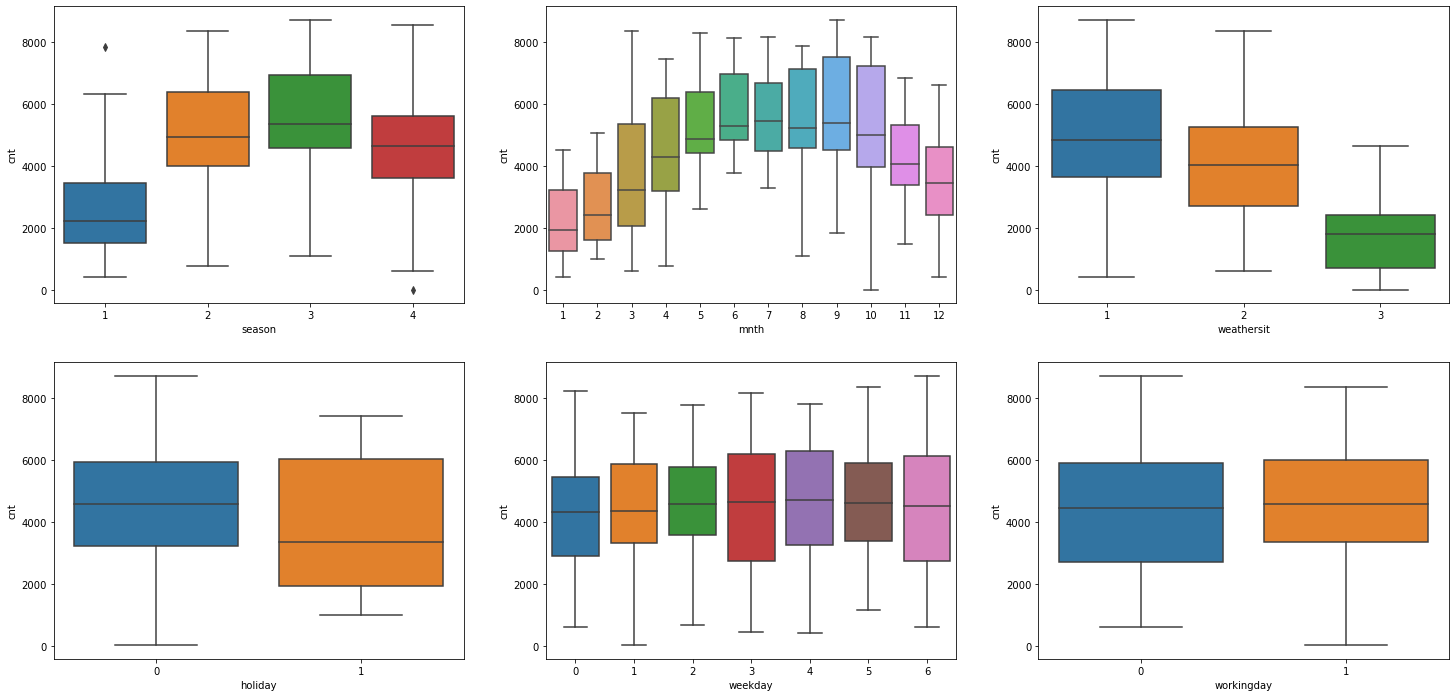

In [39]:
## Categorical data can be visualised by using the box plot 

plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = rent)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = rent)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rent)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = rent)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = rent)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rent)
plt.show()

In [40]:
# Correlation Matrix 


<AxesSubplot:>

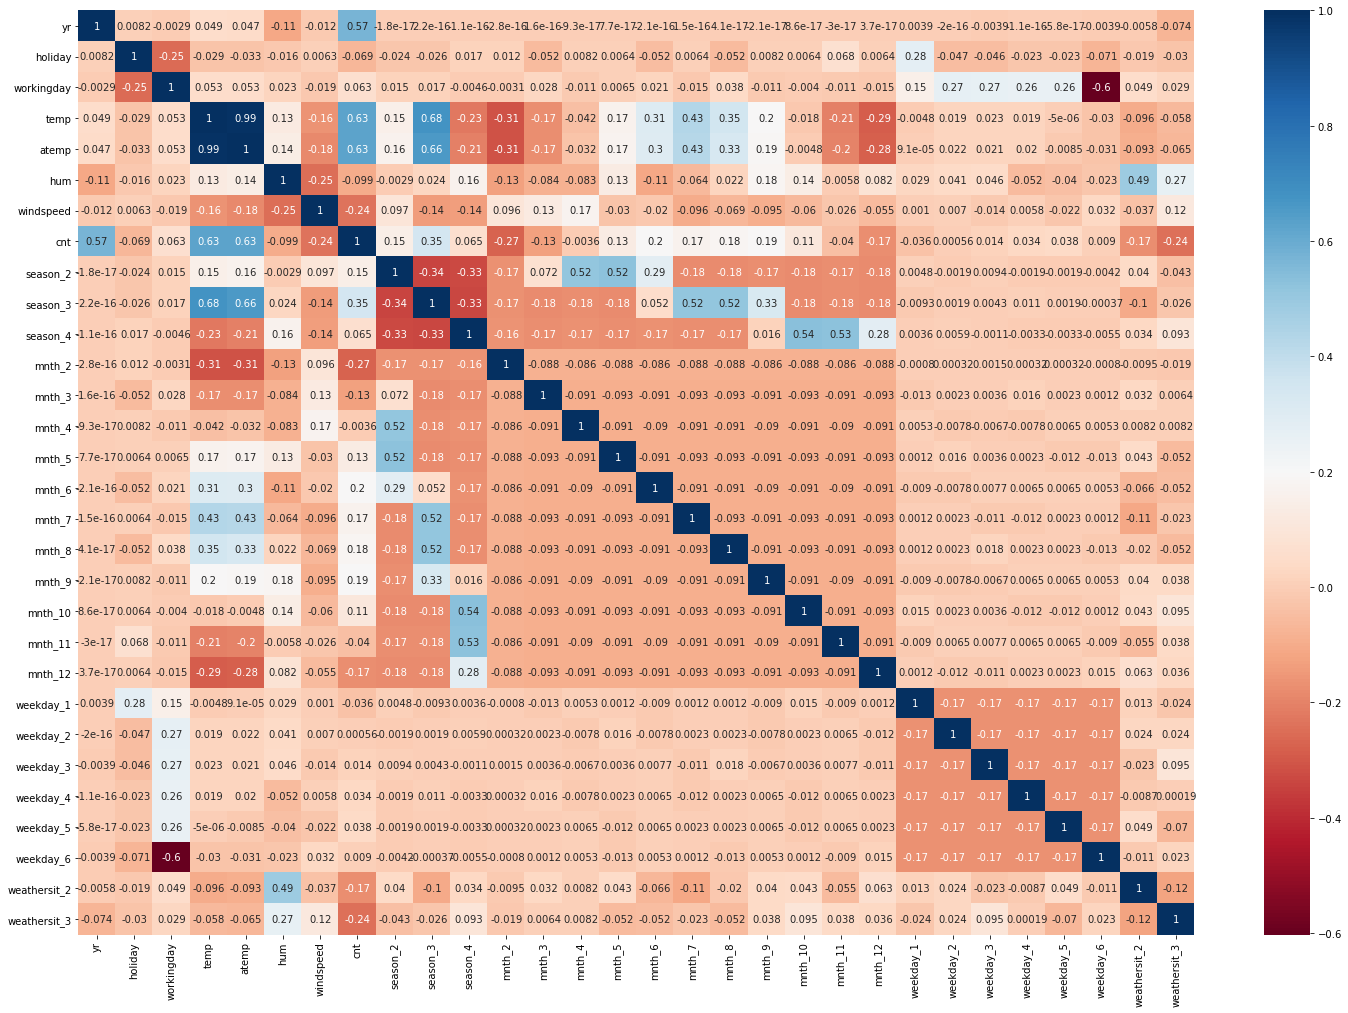

In [41]:
plt.figure(figsize=(25,17))
sns.heatmap(data=rent_new.corr(), annot=True, cmap= "RdBu")

In [42]:
# From the Heatmap we can see the variables which are multicollenaer in nature .

## Rescaling the Features 

In [43]:
scaler = MinMaxScaler()

In [44]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

rent_train[num_vars] = scaler.fit_transform(rent_train[num_vars])

In [45]:
rent_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,1,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
rent_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,0.540777,0.515530,0.647696,0.346806,0.514508,0.245098,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.147059,0.150980,0.343137,0.025490
std,0.500487,0.151726,0.465245,0.227939,0.213652,0.149805,0.160182,0.224150,0.430568,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.354512,0.358381,0.475223,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a Linear Model 

In [47]:
y_train = rent_train.pop('cnt')
X_train = rent_train

In [48]:
print(y_train.head())
print(X_train.head())

650    0.815347
212    0.488265
714    0.433042
8      0.092039
502    0.876323
Name: cnt, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
650   1        0           0  0.416433  0.409971  0.513852   0.255118   
212   0        0           1  0.887856  0.819376  0.572294   0.276919   
714   1        0           0  0.378013  0.381804  0.871429   0.161523   
8     0        0           0  0.098690  0.048706  0.451083   0.700017   
502   1        0           1  0.629300  0.619631  0.543723   0.235894   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
650         0         0         1  ...        0        0          0   
212         0         1         0  ...        0        0          1   
714         0         0         1  ...        0        1          0   
8           0         0         0  ...        0        0          0   
502         1         0         0  ...        0        0          0   

     weekday_2  weekday_3  w

##  Recursive Feature Elemination 

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building a Linear Model 

In [55]:
#Stats Model is used for Building the Linear Model 

In [56]:
#VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,383.99
3,atemp,362.65
4,hum,17.63
7,season_3,7.06
5,windspeed,4.72
1,workingday,4.65
6,season_2,3.50
8,season_4,3.00
13,weathersit_2,2.16
0,yr,2.03


In [57]:
## Model 1 using all the variables in the dataset 

In [58]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [59]:
lr1.params

const           0.194033
yr              0.228351
workingday      0.041578
temp            0.435856
atemp           0.057604
hum            -0.178591
windspeed      -0.183893
season_2        0.129556
season_3        0.079386
season_4        0.153721
mnth_3          0.047424
mnth_9          0.100011
mnth_10         0.054234
weekday_6       0.055457
weathersit_2   -0.047287
weathersit_3   -0.271163
dtype: float64

In [60]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.28e-186
Time:                        14:23:54   Log-Likelihood:                 509.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     494   BIC:                            -919.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1940      0.030      6.526   

In [61]:
# From the above summary we can notice that the P value and VIF value of atemp variable is very high so it can be removed

In [62]:
# Model 2 by eleminating the atemp variable

X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [64]:
# Check for the VIF values of the feature variables. 


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.20
3,hum,17.34
6,season_3,6.97
1,workingday,4.65
4,windspeed,4.56
5,season_2,3.50
7,season_4,2.99
12,weathersit_2,2.15
0,yr,2.03
11,weekday_6,1.80


In [65]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [66]:
lr2.params

const           0.194883
yr              0.228339
workingday      0.041568
temp            0.490307
hum            -0.178010
windspeed      -0.186113
season_2        0.129658
season_3        0.078445
season_4        0.153959
mnth_3          0.047559
mnth_9          0.100021
mnth_10         0.054298
weekday_6       0.055543
weathersit_2   -0.047426
weathersit_3   -0.271518
dtype: float64

In [67]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.00e-187
Time:                        14:28:13   Log-Likelihood:                 509.46
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     495   BIC:                            -925.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1949      0.030      6.575      0.000       0.137       0.253
yr               0.2283      0.008     27.994      0.000       0.212       0.244
workingday       0.0416      0.011      3.764      0.000       0.020       0.063
temp             0.4903      0.034     14.631      0.000       0.424       0.556
hum             -0.1780      0.037     -4.778      0.000      -0.251      -0.105
windspeed       -0.1861      0.027     -6.779      0.000      -0.240      -0.132
season_2         0.1297      0.015      8.557      0.000       0.100       0.159
season_3         0.0784      0.021      3.797      0.000       0.038       0.119
season_4         0.1540      0.014     10.852      0.000       0.126       0.182
mnth_3           0.0476      0.016      2.991      0.003       0.016       0.079
mnth_9           0.1000      0.016      6.313      0.000       0.069       0.131
mnth_10          0.0543      0.018      3.046      0.002       0.019       0.089
weekday_6        0.0555      0.014      3.878      0.000       0.027       0.084
weathersit_2    -0.0474      0.011     -4.461      0.000      -0.068      -0.027
weathersit_3    -0.2715      0.028     -9.572      0.000      -0.327      -0.216
==============================================================================
Omnibus:                       91.666   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.140
Skew:                          -0.924   Prob(JB):                     2.60e-48
Kurtosis:                       5.626   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#Removing the variable 'hum' based on its Very High 'VIF' value.
#Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [69]:
#Model - 3

X_train_new = X_train_new.drop(["hum"], axis = 1)

In [70]:
#Check for the VIF values of the feature variables. 


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.77
5,season_3,6.71
3,windspeed,4.28
1,workingday,4.14
4,season_2,3.48
6,season_4,2.88
0,yr,2.03
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [71]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [72]:
lr3.params

const           0.090199
yr              0.232713
workingday      0.043200
temp            0.457488
windspeed      -0.147768
season_2        0.131389
season_3        0.087909
season_4        0.150587
mnth_3          0.055652
mnth_9          0.091362
mnth_10         0.053205
weekday_6       0.056281
weathersit_2   -0.077061
weathersit_3   -0.324297
dtype: float64

In [73]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.73e-184
Time:                        14:28:16   Log-Likelihood:                 497.96
No. Observations:                 510   AIC:                            -967.9
Df Residuals:                     496   BIC:                            -908.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0902      0.020      4.422      0.000       0.050       0.130
yr               0.2327      0.008     28.100      0.000       0.216       0.249
workingday       0.0432      0.011      3.830      0.000       0.021       0.065
temp             0.4575      0.034     13.651      0.000       0.392       0.523
windspeed       -0.1478      0.027     -5.508      0.000      -0.200      -0.095
season_2         0.1314      0.015      8.489      0.000       0.101       0.162
season_3         0.0879      0.021      4.184      0.000       0.047       0.129
season_4         0.1506      0.014     10.401      0.000       0.122       0.179
mnth_3           0.0557      0.016      3.445      0.001       0.024       0.087
mnth_9           0.0914      0.016      5.681      0.000       0.060       0.123
mnth_10          0.0532      0.018      2.921      0.004       0.017       0.089
weekday_6        0.0563      0.015      3.846      0.000       0.028       0.085
weathersit_2    -0.0771      0.009     -8.734      0.000      -0.094      -0.060
weathersit_3    -0.3243      0.027    -12.148      0.000      -0.377      -0.272
==============================================================================
Omnibus:                       87.112   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.058
Skew:                          -0.887   Prob(JB):                     2.97e-45
Kurtosis:                       5.551   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# From model 3 we see the VIF value for season 3 is very high . 
# We drop season3 variable 

In [75]:
#Model - 4
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [76]:
#VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.10
0,yr,2.02
5,season_4,1.97
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [77]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [78]:
lr4.params

const           0.075145
yr              0.230752
workingday      0.043038
temp            0.569318
windspeed      -0.152269
season_2        0.083227
season_4        0.120268
mnth_3          0.044665
mnth_9          0.102902
mnth_10         0.041795
weekday_6       0.057913
weathersit_2   -0.077402
weathersit_3   -0.316757
dtype: float64

In [79]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.71e-181
Time:                        14:28:20   Log-Likelihood:                 489.12
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     497   BIC:                            -897.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0751      0.020      3.682      0.000       0.035       0.115
yr               0.2308      0.008     27.456      0.000       0.214       0.247
workingday       0.0430      0.011      3.754      0.000       0.021       0.066
temp             0.5693      0.021     27.702      0.000       0.529       0.610
windspeed       -0.1523      0.027     -5.589      0.000      -0.206      -0.099
season_2         0.0832      0.011      7.914      0.000       0.063       0.104
season_4         0.1203      0.013      9.440      0.000       0.095       0.145
mnth_3           0.0447      0.016      2.756      0.006       0.013       0.077
mnth_9           0.1029      0.016      6.389      0.000       0.071       0.135
mnth_10          0.0418      0.018      2.283      0.023       0.006       0.078
weekday_6        0.0579      0.015      3.895      0.000       0.029       0.087
weathersit_2    -0.0774      0.009     -8.631      0.000      -0.095      -0.060
weathersit_3    -0.3168      0.027    -11.700      0.000      -0.370      -0.264
==============================================================================
Omnibus:                       69.871   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.007
Skew:                          -0.780   Prob(JB):                     6.53e-31
Kurtosis:                       5.027   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# From the above summary we see that the P value for month_10 is very high. 
# Dropping the month_10 variable from the dataset

In [81]:
#Model - 5
X_train_new = X_train_new.drop(['mnth_10'], axis = 1)

In [82]:
#VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.12
1,workingday,4.10
0,yr,2.01
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [84]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [85]:
lr5.params

const           0.072584
yr              0.229599
workingday      0.043123
temp            0.576592
windspeed      -0.155076
season_2        0.082063
season_4        0.135312
mnth_3          0.045370
mnth_9          0.096521
weekday_6       0.058412
weathersit_2   -0.075771
weathersit_3   -0.311353
dtype: float64

In [86]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.51e-181
Time:                        14:29:54   Log-Likelihood:                 486.46
No. Observations:                 510   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -898.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0726      0.020      3.547      0.000       0.032       0.113
yr               0.2296      0.008     27.253      0.000       0.213       0.246
workingday       0.0431      0.012      3.746      0.000       0.021       0.066
temp             0.5766      0.020     28.280      0.000       0.537       0.617
windspeed       -0.1551      0.027     -5.674      0.000      -0.209      -0.101
season_2         0.0821      0.011      7.780      0.000       0.061       0.103
season_4         0.1353      0.011     12.356      0.000       0.114       0.157
mnth_3           0.0454      0.016      2.789      0.005       0.013       0.077
mnth_9           0.0965      0.016      6.060      0.000       0.065       0.128
weekday_6        0.0584      0.015      3.912      0.000       0.029       0.088
weathersit_2    -0.0758      0.009     -8.440      0.000      -0.093      -0.058
weathersit_3    -0.3114      0.027    -11.496      0.000      -0.365      -0.258
==============================================================================
Omnibus:                       61.344   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.251
Skew:                          -0.721   Prob(JB):                     2.56e-25
Kurtosis:                       4.802   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# From the above summary we can see that the P value of mnth_3 variable is high . Removing mnth_3 variable 



In [89]:
# Model - 6

X_train_new = X_train_new.drop(['mnth_3'], axis = 1)


In [90]:
#VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.55
8,weathersit_2,1.53
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [91]:
X_train_lm6 = sm.add_constant(X_train_new)

lr6 = sm.OLS(y_train,X_train_lm6).fit()

In [92]:
lr6.params

const           0.082768
yr              0.230252
workingday      0.043963
temp            0.564438
windspeed      -0.154241
season_2        0.082300
season_4        0.129186
mnth_9          0.094832
weekday_6       0.057838
weathersit_2   -0.074921
weathersit_3   -0.307082
dtype: float64

In [93]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.48e-181
Time:                        14:44:12   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.083      0.000       0.043       0.123
yr               0.2303      0.008     27.157      0.000       0.214       0.247
workingday       0.0440      0.012      3.794      0.000       0.021       0.067
temp             0.5644      0.020     28.148      0.000       0.525       0.604
windspeed       -0.1542      0.028     -5.606      0.000      -0.208      -0.100
season_2         0.0823      0.011      7.750      0.000       0.061       0.103
season_4         0.1292      0.011     11.960      0.000       0.108       0.150
mnth_9           0.0948      0.016      5.918      0.000       0.063       0.126
weekday_6        0.0578      0.015      3.848      0.000       0.028       0.087
weathersit_2    -0.0749      0.009     -8.294      0.000      -0.093      -0.057
weathersit_3    -0.3071      0.027    -11.280      0.000      -0.361      -0.254
==============================================================================
Omnibus:                       62.180   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.524
Skew:                          -0.707   Prob(JB):                     2.48e-27
Kurtosis:                       4.941   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# This model looks good as the VIF values for all the variables is low which means there is less Multicollinearity and even the 
# P values are very low for this model .Therefore we consider this model as the final model . 

### Residual Analysis of Training Data

In [95]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

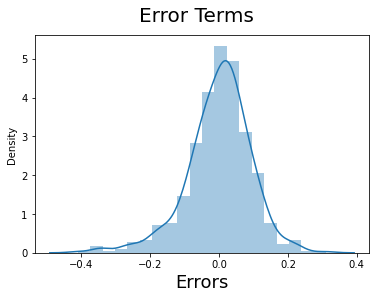

In [96]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

In [97]:
# From the above Histogram its clear that the Residuals are normally distributed . Therefore Linear model is correct 

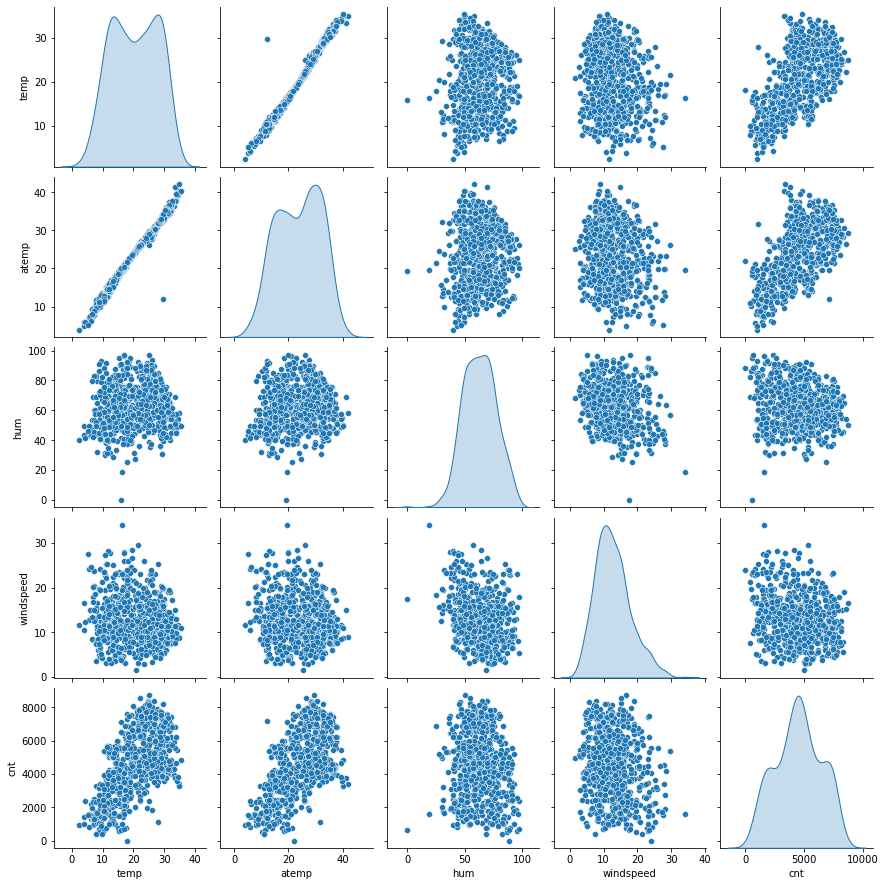

In [99]:
rent_new=rent_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(rent_new, diag_kind='kde')
plt.show()

In [100]:
#From the above pairplot we see that there is a Linear relationship between Temp, atemp and cnt

## Making the Prediction on the Test data using the Final Model .

In [101]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

rent_test[num_vars] = scaler.transform(rent_test[num_vars])

In [102]:
rent_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [104]:
rent_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,...,0.072727,0.104545,0.154545,0.145455,0.118182,0.172727,0.131818,0.127273,0.322727,0.036364
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,...,0.260281,0.306665,0.362295,0.353363,0.323559,0.378873,0.339064,0.334038,0.468586,0.187620
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
#Dividing into X_test and y_test

y_test = rent_test.pop('cnt')
X_test = rent_test


In [107]:
print(y_test.head())
print(X_test.head())

22     0.110907
468    0.855729
553    0.534975
504    0.817648
353    0.428900
Name: cnt, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
22    0        0           0  0.046591  0.025950  0.453529   0.462217   
468   1        0           0  0.543115  0.536771  0.522511   0.347424   
553   1        0           0  0.951196  0.933712  0.596104   0.212829   
504   1        0           0  0.699909  0.662746  0.551083   0.478229   
353   0        0           1  0.407087  0.416610  0.618615   0.080770   

     season_2  season_3  season_4  ...  mnth_11  mnth_12  weekday_1  \
22          0         0         0  ...        0        0          0   
468         1         0         0  ...        0        0          0   
553         0         1         0  ...        0        0          0   
504         1         0         0  ...        0        0          0   
353         0         0         1  ...        0        1          0   

     weekday_2  weekday_3  w

In [108]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null   

In [113]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
print(col1)  # Columns in the final Model 
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   weekday_6     220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [115]:
lr6.params

const           0.082768
yr              0.230252
workingday      0.043963
temp            0.564438
windspeed      -0.154241
season_2        0.082300
season_4        0.129186
mnth_9          0.094832
weekday_6       0.057838
weathersit_2   -0.074921
weathersit_3   -0.307082
dtype: float64

In [116]:
lr6.summary()  # Summary for the final model for Test data 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          4.48e-181
Time:                        16:35:10   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0828      0.020      4.083      0.000       0.043       0.123
yr               0.2303      0.008     27.157      0.000       0.214       0.247
workingday       0.0440      0.012      3.794      0.000       0.021       0.067
temp             0.5644      0.020     28.148      0.000       0.525       0.604
windspeed       -0.1542      0.028     -5.606      0.000      -0.208      -0.100
season_2         0.0823      0.011      7.750      0.000       0.061       0.103
season_4         0.1292      0.011     11.960      0.000       0.108       0.150
mnth_9           0.0948      0.016      5.918      0.000       0.063       0.126
weekday_6        0.0578      0.015      3.848      0.000       0.028       0.087
weathersit_2    -0.0749      0.009     -8.294      0.000      -0.093      -0.057
weathersit_3    -0.3071      0.027    -11.280      0.000      -0.361      -0.254
==============================================================================
Omnibus:                       62.180   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.524
Skew:                          -0.707   Prob(JB):                     2.48e-27
Kurtosis:                       4.941   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

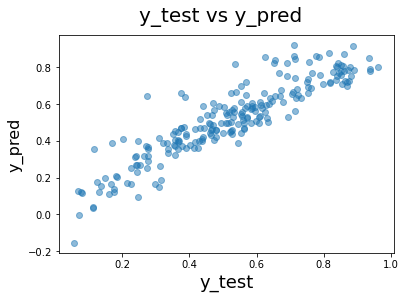

In [118]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [119]:
# From the above plot we can see that there is a Linear relationship between y_pred and y_test

### R^2 Value for Test

In [120]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8205670075773204

### Adjusted R^2 value for Test 

In [121]:
r2 = 0.8205670075773204

In [122]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8119816969350869

As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5644’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5644 units.
Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.3071’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3071 units.
Year (yr) - A coefficient value of ‘0.2303’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2303 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
The next best features that can also be considered are

season_4: - A coefficient value of ‘0.1292’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1292 units.
windspeed: - A coefficient value of ‘-0.1542’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1542 units.